### Notebook for downloading and preprocessing the ACSIncome dataset using FolkTables

In [1]:
# required modules (skip if already installed)
if False:
    !pip install folktables

In [2]:
# global imports
import sys
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# folktables module
from folktables import ACSDataSource, ACSIncome

In [3]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
          'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
          'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
          'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
          'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
data = dict()
for s in states:
    data[s] = data_source.get_data(states=[s], download=True)
    data[s]['STATE'] = s

In [4]:
ACSIncome_categories = {
    "COW": {
        1.0: (
            "Employee of a private for-profit company or"
            "business, or of an individual, for wages,"
            "salary, or commissions"
        ),
        2.0: (
            "Employee of a private not-for-profit, tax-exempt,"
            "or charitable organization"
        ),
        3.0: "Local government employee (city, county, etc.)",
        4.0: "State government employee",
        5.0: "Federal government employee",
        6.0: (
            "Self-employed in own not incorporated business,"
            "professional practice, or farm"
        ),
        7.0: (
            "Self-employed in own incorporated business,"
            "professional practice or farm"
        ),
        8.0: "Working without pay in family business or farm",
        9.0: "Unemployed and last worked 5 years ago or earlier or never worked",
    },
    "SCHL": {
        1.0: "No schooling completed",
        2.0: "Nursery school, preschool",
        3.0: "Kindergarten",
        4.0: "Grade 1",
        5.0: "Grade 2",
        6.0: "Grade 3",
        7.0: "Grade 4",
        8.0: "Grade 5",
        9.0: "Grade 6",
        10.0: "Grade 7",
        11.0: "Grade 8",
        12.0: "Grade 9",
        13.0: "Grade 10",
        14.0: "Grade 11",
        15.0: "12th grade - no diploma",
        16.0: "Regular high school diploma",
        17.0: "GED or alternative credential",
        18.0: "Some college, but less than 1 year",
        19.0: "1 or more years of college credit, no degree",
        20.0: "Associate's degree",
        21.0: "Bachelor's degree",
        22.0: "Master's degree",
        23.0: "Professional degree beyond a bachelor's degree",
        24.0: "Doctorate degree",
    },
    "MAR": {
        1.0: "Married",
        2.0: "Widowed",
        3.0: "Divorced",
        4.0: "Separated",
        5.0: "Never married or under 15 years old",
    },
    "SEX": {1.0: "Male", 2.0: "Female"},
    "RAC1P": {
        1.0: "White alone",
        2.0: "Black or African American alone",
        3.0: "American Indian alone",
        4.0: "Alaska Native alone",
        5.0: (
            "American Indian and Alaska Native tribes specified;"
            "or American Indian or Alaska Native,"
            "not specified and no other"
        ),
        6.0: "Asian alone",
        7.0: "Native Hawaiian and Other Pacific Islander alone",
        8.0: "Some Other Race alone",
        9.0: "Two or More Races",
    },
}

In [5]:
df = None
for s in states:
    features, labels, _ = ACSIncome.df_to_pandas(data[s], categories=ACSIncome_categories)
    features['STATE'] = s
    features['class'] = labels
    df = pd.concat([df, features], axis=0).reset_index(drop=True) if df is not None else features
del df["RELP"]
# binning of WKHP and AGEP
df["WKHPgroup"] = pd.cut(df["WKHP"], bins=[0, 11, 21, 31, 41, 101], labels=["0-10", "11-20", "21-30", "31-40", ">40"])
df["AGEPgroup"] = pd.cut(df["AGEP"], bins=[16, 31, 41, 51, 61, 1000], labels=["16-30", "31-40", "41-50", "51-60", ">60"])
# grouping of POBP and OCCP - see https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2016-2020.pdf
df["POBPgroup"] = pd.cut(df["POBP"], bins=[0, 99, 199, 299, 399, 499, 599], labels=["US", "Europe", "Asia", "Americas", "Africa", "Australia"])
df["OCCPgroup"] = pd.cut(df["OCCP"], bins=[0, 441, 751, 961, 1241, 1561, 1981, 2061, 2181, 2556, 2921, 3551, 3656, 3961, 4161,
                                     4256, 4656, 4966, 5941, 6131, 6766, 6951, 7641, 8991, 9761, 9831, 10000], 
                    labels=["MGR", "BUS", "FIN", "CMM", "ENG", "SCI", "CMS", "LGL", "EDU", "ENT", "MED", "HLS", "PRT", "EAT",
                           "CLN", "PRS", "SAL", "OFF", "FFF", "CON", "EXT", "RPR", "PRD", "TRN", "MIL", "Unp, no exp, never worked"])

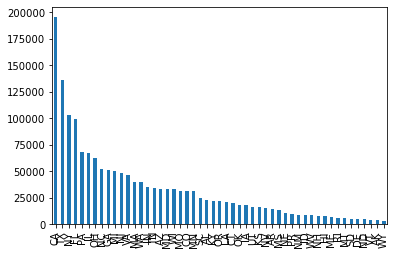

In [6]:
df["STATE"].value_counts().plot(kind='bar')
plt.show()

In [7]:
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,WKHP,SEX,RAC1P,STATE,class,WKHPgroup,AGEPgroup,POBPgroup,OCCPgroup
0,18,Employee of a private for-profit company orbus...,"Some college, but less than 1 year",Never married or under 15 years old,4720.0,13,21.0,Female,Black or African American alone,AL,False,11-20,16-30,US,SAL
1,53,Federal government employee,GED or alternative credential,Never married or under 15 years old,3605.0,18,40.0,Male,White alone,AL,False,31-40,51-60,US,HLS
2,41,Employee of a private for-profit company orbus...,Regular high school diploma,Never married or under 15 years old,7330.0,1,40.0,Male,White alone,AL,False,31-40,31-40,US,RPR
3,18,Self-employed in own not incorporated business...,"Some college, but less than 1 year",Never married or under 15 years old,2722.0,1,2.0,Female,White alone,AL,False,0-10,16-30,US,ENT
4,21,Federal government employee,"1 or more years of college credit, no degree",Never married or under 15 years old,3870.0,12,50.0,Male,White alone,AL,False,>40,16-30,US,PRT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664495,39,Self-employed in own not incorporated business...,Regular high school diploma,Never married or under 15 years old,6260.0,72,20.0,Male,White alone,PR,False,11-20,31-40,US,CON
1664496,38,Self-employed in own not incorporated business...,Grade 11,Never married or under 15 years old,4251.0,72,32.0,Male,Some Other Race alone,PR,False,31-40,31-40,US,CLN
1664497,37,Employee of a private for-profit company orbus...,"1 or more years of college credit, no degree",Divorced,7750.0,17,40.0,Female,Two or More Races,PR,False,31-40,31-40,US,PRD
1664498,47,Employee of a private for-profit company orbus...,Regular high school diploma,Married,8990.0,72,40.0,Male,Some Other Race alone,PR,False,31-40,41-50,US,PRD


In [8]:
# Save df
df.to_pickle('../data/ACSIncome.pkl')